In [11]:
import numpy as np
from astropy.modeling.models import Sersic2D
from astropy.modeling import models, fitting
import astropy.io.fits as fits 
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import stats
import random

In [12]:
#There's 7times more outflow than Moffat shows. 

In [13]:
y, x = np.mgrid[:11, :11]
hdu = fits.open('subcube_HE0232-0900_new.fits')

Hb_1 = hdu[1].data
OIII5007_1 = hdu[2].data
Hb_2 = hdu[3].data
OIII5007_2 = hdu[4].data
OIII5007_br = hdu[5].data
Hb_br = hdu[6].data
Hb1 = hdu[7].data
Hb2 = hdu[8].data
Fe5018_1 = hdu[9].data
Fe5018_2 = hdu[10].data

hdu.close()

In [14]:
amp_Hb_1 = np.max(Hb_1)
amp_OIII5007_1 = np.max(OIII5007_1)
amp_Hb_2 = np.max(Hb_2)
amp_OIII5007_2 = np.max(OIII5007_2)
amp_OIII5007_br = np.max(OIII5007_br)
amp_Hb_br = np.max(Hb_br)
amp_Hb1 = np.max(Hb1)
amp_Hb2 = np.max(Hb2)
amp_Fe5018_1 = np.max(Fe5018_1)
amp_Fe5018_2 = np.max(Fe5018_2)

In [15]:
hdu = fits.open('subcube_HE0232-0900_err_new.fits')

Hb_1_err = hdu[1].data
OIII5007_1_err = hdu[2].data
Hb_2_err = hdu[3].data
OIII5007_2_err = hdu[4].data
OIII5007_br_err = hdu[5].data
Hb_br_err = hdu[6].data
Hb1_err = hdu[7].data
Hb2_err = hdu[8].data
Fe5018_1_err = hdu[9].data
Fe5018_2_err = hdu[10].data

hdu.close()

In [16]:
[y0_blr,x0_blr]= ndimage.measurements.maximum_position(Hb2)

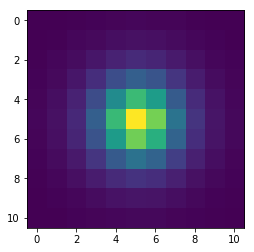

In [19]:
p_init = models.Moffat2D(amplitude = amp_Hb2, x_0=x0_blr, y_0=y0_blr,gamma=3,alpha=3)
f = fitting.LevMarLSQFitter()
p = f(p_init, x, y, Hb2)
res = Hb2 - p(x,y)
plt.imshow(p(x,y))
plt.show()

In [30]:
[amp1,x1, y1,gamma1,alpha1] = p.parameters
amp1

5.9268551438529498

In [28]:
Monte_Carlo_loops = 100
parameters_MC = np.zeros((len(p.parameters),Monte_Carlo_loops))
for l in range(Monte_Carlo_loops):
        iteration_data = np.random.normal(Hb2,Hb2_err) 
        p_MC_init = models.Moffat2D(amplitude = amp1,x_0=x1,y_0=y1,gamma=gamma1,alpha=alpha1)
        f = fitting.LevMarLSQFitter()
        p_MC = f(p_MC_init, x, y, iteration_data)
        parameters_MC[:,l]=p_MC.parameters
parameters_err = np.std(parameters_MC,1)  
[amp1_err, x1_err, y1_err,gamma1_err,alpha1_err] = parameters_err

In [29]:
parameters_err

array([  6.11093417e+01,   2.91139489e-01,   3.51582499e-01,
         3.38164357e+01,   9.58279567e+02])

In [24]:
column_names={'amp':0,'x0':1,'y0':2,'gamma':3,'alpha':4}
columns=[]
for key in column_names.keys():
    columns.append(fits.Column(name=key,format='E',array=[p.parameters[column_names[key]]]))
    columns.append(fits.Column(name=key+'_err',format='E',array=[parameters_err[column_names[key]]]))
coldefs = fits.ColDefs(columns)
hdu = fits.BinTableHDU.from_columns(coldefs)
hdu.writeto('HE0232-0900_Hb_blr.fits',overwrite=True)

In [31]:
gamma_fix = gamma1
alpha_fix = alpha1

In [33]:
[y0_br,x0_br]= ndimage.measurements.maximum_position(OIII5007_1)#Find the positions of the maximums of the values of an array at labels.

In [35]:
p_br_init = models.Moffat2D(amplitude = amp_OIII5007_1, x_0=x0_br, y_0=y0_br,gamma=gamma1,alpha=alpha1,fixed={'gamma':True,'alpha':True})                     
f = fitting.LevMarLSQFitter()
p_br = f(p_br_init, x, y, OIII5007_1)
res = OIII5007_1 - p_br(x,y)

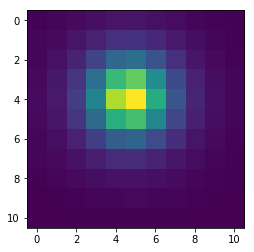

In [36]:
plt.imshow(p_br(x,y))
plt.show()

In [37]:
[amp2,x2,y2,gamma2,alpha2] = p_br.parameters

In [15]:
Monte_Carlo_loops = 100
parameters_MC = np.zeros((len(p_br.parameters),Monte_Carlo_loops))
for l in range(Monte_Carlo_loops):
        iteration_data = np.random.normal(OIII_br,OIII_br_err) 
        p_MC_init = models.Moffat2D(amplitude=amp2,x_0=x2,y_0=y2,gamma=gamma2,alpha=alpha2,fixed={'gamma':True,'alpha':True})
        f = fitting.LevMarLSQFitter()
        p_MC = f(p_MC_init, x, y, iteration_data)
        parameters_MC[:,l]=p_MC.parameters
        parameters_err = np.std(parameters_MC,1)  
        [amp2_err, x2_err, y2_err,gamma2_err,alpha2_err] = parameters_err

In [16]:
column_names={'amp':0,'x0':1,'y0':2,'gamma':3,'alpha':4}
columns=[]
for key in column_names.keys():
    columns.append(fits.Column(name=key,format='E',array=[p_br.parameters[column_names[key]]]))
    columns.append(fits.Column(name=key+'_err',format='E',array=[parameters_err[column_names[key]]]))
coldefs = fits.ColDefs(columns)
hdu = fits.BinTableHDU.from_columns(coldefs)
hdu.writeto('HE0232-0900_OIII_br_moffat_table2.fits',overwrite=True)

In [17]:
hdu = fits.open('HE0232-0900_OIII_br_moffat_table2.fits')
central_tab = hdu[1].data
central_column = hdu[1].header
gamma_fix = central_tab.field('gamma')[0]
alpha_fix = central_tab.field('alpha')[0]
hdu.close()
print(gamma_fix)

2.74882


In [40]:
[y0_nr,x0_nr]= ndimage.measurements.maximum_position(OIII5007_br)

In [41]:
p_nr_init = models.Moffat2D(amplitude = amp_OIII5007_br, x_0=x0_nr, y_0=y0_nr,gamma=gamma_fix,alpha=alpha_fix,fixed={'gamma':True,'alpha':True})                     
f = fitting.LevMarLSQFitter()
p_nr = f(p_nr_init, x, y, OIII5007_br)
res = OIII5007_br - p_nr(x,y)

In [42]:
[amp3,x3,y3,gamma3,alpha3] = p_nr.parameters

In [21]:
Monte_Carlo_loops = 100
parameters_MC = np.zeros((len(p_nr.parameters),Monte_Carlo_loops))
for l in range(Monte_Carlo_loops):
        iteration_data = np.random.normal(OIII_nr,OIII_nr_err) 
        p_MC_init = models.Moffat2D(amplitude=amp3,x_0=x3,y_0=y3,gamma=gamma3,alpha=alpha3,fixed={'gamma':True,'alpha':True})
        f = fitting.LevMarLSQFitter()
        p_MC = f(p_MC_init, x, y, iteration_data)
        parameters_MC[:,l]=p_MC.parameters
        parameters_err = np.std(parameters_MC,1)  
        [amp3_err, x3_err, y3_err,gamma3_err,alpha3_err] = parameters_err

In [22]:
column_names={'amp':0,'x0':1,'y0':2,'gamma':3,'alpha':4}
columns=[]
for key in column_names.keys():
    columns.append(fits.Column(name=key,format='E',array=[p_nr.parameters[column_names[key]]]))
    columns.append(fits.Column(name=key+'_err',format='E',array=[parameters_err[column_names[key]]]))
coldefs = fits.ColDefs(columns)
hdu = fits.BinTableHDU.from_columns(coldefs)
hdu.writeto('HE0232-0900_OIII_nr_moffat_table2.fits',overwrite=True)

In [23]:
hdu = fits.open('HE0232-0900_OIII_nr_moffat_table2.fits')
central_tab = hdu[1].data
central_column = hdu[1].header
gamma_fix = central_tab.field('gamma')[0]
alpha_fix = central_tab.field('alpha')[0]
hdu.close()
print(gamma_fix)

2.74882


In [24]:
hdus=[]
#amp_Hb,amp_OIII5007,amp_OIII5007_br,amp_Hb_br,amp_Hb1,amp_Hb2,amp_Fe5018_1,amp_Fe5018_2,m,c
hdus.append(fits.PrimaryHDU())
hdus.append(fits.ImageHDU(p(x,y),name='Hb_blr'))
hdus.append(fits.ImageHDU(p_br(x,y),name='OIII_br'))
hdus.append(fits.ImageHDU(p_nr(x,y),name='OIII_nr'))
hdu = fits.HDUList(hdus)
hdu.writeto('flux_map_moffat_model_HE0232-0900_new.fits',overwrite='True')

In [25]:
blr_x = x1
blr_y = y1
wing_x = x2
wing_y = y2

In [26]:
outflow_size_pix = np.sqrt((wing_x -  blr_x)**2 + (wing_y -  blr_y)**2)
outflow_size_arc = 0.4*outflow_size_pix   
print("Centroid Difference size in Arcseconds: ",outflow_size_arc)

Centroid Difference size in Arcseconds:  0.0469286931496


In [27]:
distance = 175.5
outflow_size_parsec = (distance*outflow_size_arc)*4.848
print("Outflow Offset size in Parsecs:  ",outflow_size_parsec)

Outflow Offset size in Parsecs:   39.9280584203
